# Maximal Clique Problem
## Report of implementations
**Student:** Matheus Silva Melo de Oliveira

**Institution:** Insper Instituto de Ensino e Pesquisa

<div align="center">
<img width="400px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/VR_complex.svg/1200px-VR_complex.svg.png"/>
</div>

## Motivation
The concept of a clique in a graph is relatively simple. At the most general level, a clique is a subset of a network in which the actors are more closely connected to each other than to other members of the network. In terms of friendship ties, for example, it is not uncommon to find human groups that form cliques based on age, gender, race, ethnicity, religion, ideology, and many other factors. A clique is, therefore, a set of vertices in a graph where every pair of vertices is directly connected by an edge.

Finding the maximum clique in a graph is a computationally challenging task due to the combinatorial nature of the problem. The computational difficulty arises from the need to explore all possible combinations of vertices to identify the largest clique, which becomes exponential in relation to the number of vertices. This results in high computational complexity, even for moderately large graphs.

Cliques are important because, in addition to developing homogeneous behaviors among their members, they have, by definition, great proximity, increasing the speed of exchanges. Thus, information directed at a clique is quickly absorbed by its members, who tend to perceive it similarly. This is important, for example, in segmentation strategies.

Therefore, the efficient resolution of the maximum clique problem has valuable applications in areas ranging from computer science to data analysis in social networks.



**It's expected to run  this notebook in Google Colab, to run in a local machine (Linux ou WSL), run *run.sh* file**

## Setup

In [1]:
%cd "../.."
!rm -rf Maximal-Clique-Problem

/


In [2]:
!git clone https://github.com/matheus-1618/Maximal-Clique-Problem

Cloning into 'Maximal-Clique-Problem'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 236 (delta 128), reused 141 (delta 58), pack-reused 0
Receiving objects: 100% (236/236), 2.31 MiB | 17.30 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [3]:
%cd "Maximal-Clique-Problem/src"

/Maximal-Clique-Problem/src


## Generating the graph
Using the python lib *networkx*, we create a graph that it's going to be used in the implementations.

In [4]:

import networkx as nx
import matplotlib.pyplot as plt
import random
import sys

def generate_graph(vertex: int, plot: bool):
    # Parameters
    num_vertices = vertex  # Number of vertices in the graph
    probability_connection = 0.7  # Probability of having an edge between two vertices (adjust as needed)

    # Create a densely connected random graph
    graph = nx.fast_gnp_random_graph(num_vertices, probability_connection)

    # Output file name
    file_name = "implementations/graph.txt"
    # Open the file for writing
    with open(file_name, 'w') as file:
        # Write the number of vertices and the number of edges in the first line
        file.write(f"{num_vertices} {graph.number_of_edges()}\n")

        # Write the edges in the adjacency list format
        for edge in graph.edges():
            file.write(f"{edge[0] + 1} {edge[1] + 1}\n")  # +1 to adjust the indices (starting at 1)

    print(f"Densely connected graph generated and saved in '{file_name}'.")

    if plot:
        # Plot the graph
        pos = nx.spring_layout(graph)  # Layout algorithm (you can choose other layouts)
        nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue',
                font_color='black', font_size=10, edge_color='gray', linewidths=1, alpha=0.7)

        # Show the plot
        plt.show()



Densely connected graph generated and saved in 'implementations/graph.txt'.


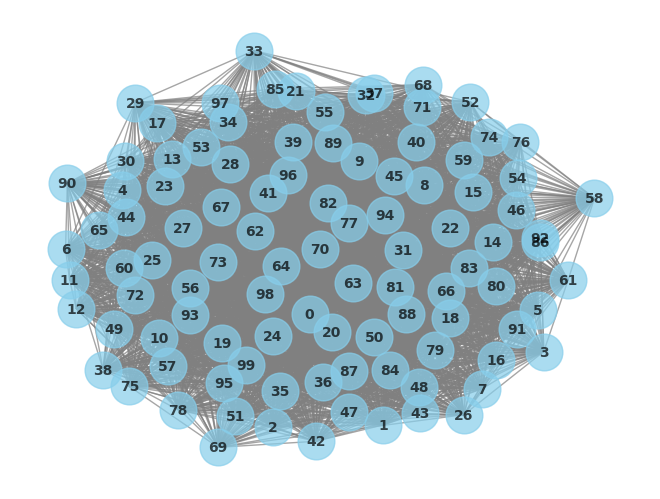

In [5]:
generate_graph(100,True)

## First implementation: Simple Search clique
In the file named **0_search_clique.cpp** , we developed a simple search algorithm that starts always from the last node (by its ID in the graph file), and add a adjacent node if both belongs to the same clique.

In [6]:
!g++ -Wall -O3 -g implementations/0_search_clique.cpp -o 0_search_clique
!./0_search_clique

[Implementation-Basics] Clique's Size: 12 Maximal Clique: 36 44 64 71 83 87 88 94 96 98 99 100 


## Second implementation: Using the number of edges as heuristics
In the file named **1_edges_heuristic.cpp** ,we keep the basic logic of the implementation above, we sort the candidate's vector by the quantity of edges.

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

struct node {
    int id;
    int edges;
};

bool biggerThan(int a, int b){
    return a < b;
}

bool biggerEdges(node a, node b){
    return a.edges < b.edges;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }
    file.close();

    return graph;
}

vector<int> FindMaximalClique(vector<vector<int>>& graph, int numVertex) {
    vector<int> MaximalClique;
    vector<node> candidates;

    // In the begin, all nodes are possible candidates
    for (int i = 0; i < numVertex; ++i) {
        node candidate;
        candidate.id = i;
        candidate.edges = 0;
        int edges = 0;
        for (int j = 0; j < numVertex; j++){
            edges += graph[j][i];
        }
        candidate.edges = edges;
        candidates.push_back(candidate);
    }
    
    sort(candidates.begin(),candidates.end(),biggerEdges);
  
    while (!candidates.empty()) {
        node v = candidates.back();
        candidates.pop_back();
        bool canAdd = true;

        for (int u : MaximalClique) {
            if (graph[u][v.id] == 0) {
                canAdd = false;
                break;
            }
        }

        if (canAdd) {
            MaximalClique.push_back(v.id);
            vector<node> newCandidates;
            for (node u : candidates) {
                bool adjacentToAll = true;
                for (int c : MaximalClique) {
                    if (graph[u.id][c] == 0) {
                        adjacentToAll = false;
                        break;
                    }
                }
                if (adjacentToAll) {
                    newCandidates.push_back(u);
                }
            }
            candidates = newCandidates;
        }
    }
    return MaximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    graph = ReadGraph("implementations/graph.txt", numVertex);
    vector<int> maximalClique = FindMaximalClique(graph, numVertex);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);

    cout << "[Implementation-Heuristics] Clique's Size: "<< maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v+1 << " ";
    }
    cout << endl;

    return 0;
}

```

In [7]:
!g++ -Wall -O3 -g implementations/1_edges_heuristic.cpp -o 1_edges_heuristic
!./1_edges_heuristic

[Implementation-Heuristics] Clique's Size: 14 Maximal Clique: 2 6 16 19 25 37 42 54 64 65 81 85 96 97 


## Third implementation: Recursive Approach
In the file named **2_recursive_clique.cpp**, we're using a recursive approach for each clique found.

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                return false;
            }
        }
    }
    return true;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    graph = ReadGraph("implementations/graph.txt", numVertex);
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Recursive] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}
```

In [8]:
!g++ -Wall -O3 -g implementations/2_recursive_clique.cpp -o 2_recursive_clique
!./2_recursive_clique

[Implementation-Recursive] Clique's Size: 15 Maximal Clique: 2 17 20 21 36 44 49 64 83 87 92 94 96 99 100 


## Fourth Implementation: Dynamic Programming

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

// Memoization table for isClique function
vector<vector<int>> memoTable;

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    
    // Check if the result is already memoized
    if (!memoTable[n].empty()) {
        return memoTable[n][candidate.back()];
    }

    for (int i = 0; i < n; ++i) {
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                // Memoize the result before returning
                memoTable[n][candidate.back()] = false;
                return false;
            }
        }
    }

    // Memoize the result before returning
    memoTable[n][candidate.back()] = true;
    return true;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    // Initialize the memoization table

    graph = ReadGraph("implementations/graph.txt", numVertex);
    memoTable.resize(numVertex, vector<int>(numVertex, -1));
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Dynamic] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}

```

In [9]:
!g++ -Wall -O3 -g implementations/3_dynamic_programming.cpp -o 3_dynamic_programming
!./3_dynamic_programming

[Implementation-Dynamic] Clique's Size: 15 Maximal Clique: 2 17 20 21 36 44 49 64 83 87 92 94 96 99 100 


## Fifth Implementation: Parallel Exaustive Approach

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>
#include <omp.h>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    #pragma omp for
    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        #pragma omp critical
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }
    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    bool clique = true;
    for (int i = 0; i < n; ++i) {
        #pragma omp for
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                #pragma omp critical
                clique = false;
            }
        }    
    }
    return clique;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }

    
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v

    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);


    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    graph = ReadGraph("implementations/graph.txt", numVertex);
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Recursive Parallel] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    #pragma omp for
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}
```

In [10]:
!g++ -Wall -O3 -g -fopenmp implementations/4_recursive_clique_parallel.cpp -o 4_recursive_clique_parallel
!./4_recursive_clique_parallel


[Implementation-Recursive Parallel] Clique's Size: 15 Maximal Clique: 2 17 20 21 36 44 49 64 83 87 92 94 96 99 100 


#Sixth implementation: Parallel Dynamic Programming

```cpp
#include <iostream>
#include <fstream>
#include <vector>
#include <string>
#include <cmath>
#include <algorithm>

using namespace std;

bool biggerThan(int a, int b) {
    return a < b;
}

// Memoization table for isClique function
vector<vector<int>> memoTable;

vector<vector<int>> ReadGraph(const std::string& fileName, int& numVertex) {
    ifstream file(fileName);
    int numEdges;
    file >> numVertex >> numEdges;

    vector<vector<int>> graph(numVertex, vector<int>(numVertex, 0));

    #pragma omp for
    for (int i = 0; i < numEdges; ++i) {
        int u, v;
        file >> u >> v;
        #pragma omp critical
        graph[u - 1][v - 1] = 1;
        graph[v - 1][u - 1] = 1;  // O graph é não direcionado
    }

    file.close();

    return graph;
}

bool isClique(vector<int>& candidate, vector<vector<int>>& graph) {
    int n = candidate.size();
    bool clique = true;
    // Check if the result is already memoized
    if (!memoTable[n].empty()) {
        return memoTable[n][candidate.back()];
    }

    for (int i = 0; i < n; ++i) {
        #pragma omp for
        for (int j = i + 1; j < n; ++j) {
            if (graph[candidate[i]][candidate[j]] == 0) {
                // Memoize the result before returning
                #pragma omp critical
                memoTable[n][candidate.back()] = false;
                clique = false;
            }
        }
    }
    // Memoize the result before returning
    memoTable[n][candidate.back()] = true;
    return clique;
}

void FindAllMaximalCliques(vector<vector<int>>& graph, vector<int>& candidates, vector<int>& currentClique, vector<int>& maximalClique) {
    if (candidates.empty()) {
        if (currentClique.size() > maximalClique.size() && isClique(currentClique, graph)) {
            maximalClique = currentClique;
        }
        return;
    }

    int v = candidates.back();
    candidates.pop_back();

    // Include vertex v in the current clique
    currentClique.push_back(v);

    // Find all maximal cliques including v
    vector<int> newCandidates;
    for (int u : candidates) {
        if (graph[v][u] == 1) {
            newCandidates.push_back(u);
        }
    }
    FindAllMaximalCliques(graph, newCandidates, currentClique, maximalClique);

    // Exclude vertex v from the current clique
    currentClique.pop_back();

    // Find all maximal cliques without v
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);

    candidates.push_back(v);
}

vector<int> FindMaximalClique(vector<vector<int>>& graph) {
    int numVertex = graph.size();
    vector<int> candidates;
    for (int i = 0; i < numVertex; ++i) {
        candidates.push_back(i);
    }
    vector<int> currentClique;
    vector<int> maximalClique;
    FindAllMaximalCliques(graph, candidates, currentClique, maximalClique);
    return maximalClique;
}

int main() {
    int numVertex;
    vector<vector<int>> graph;

    // Initialize the memoization table

    graph = ReadGraph("implementations/graph.txt", numVertex);
    memoTable.resize(numVertex, vector<int>(numVertex, -1));
    vector<int> maximalClique = FindMaximalClique(graph);
    sort(maximalClique.begin(),maximalClique.end(),biggerThan);
    cout << "[Implementation-Dynamic Parallel] Clique's Size: " << maximalClique.size() << " Maximal Clique: ";
    for (int v : maximalClique) {
        cout << v + 1 << " ";
    }
    cout << endl;

    return 0;
}
```

In [11]:
!g++ -Wall -O3 -g -fopenmp implementations/5_dynamic_programming_parallel.cpp -o 5_dynamic_programming_parallel
!./5_dynamic_programming_parallel

[Implementation-Dynamic Parallel] Clique's Size: 15 Maximal Clique: 2 17 20 21 36 44 49 64 83 87 92 94 96 99 100 


## Checking if the obtained Cliques are the maximal one or in the group of Maximals
Using another python script from the lib *networkx*, we can check the maximal Clique and it's size, and compare with the result of our implementations above.  

In [12]:
!python3 python/verify_clique.py

[Verification] Clique's Size: 15 Maximal Clique:  1 3 6 32 41 42 53 65 67 75 80 84 85 89 90


Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.
Densely connected graph generated and saved in 'implementations/graph.txt'.


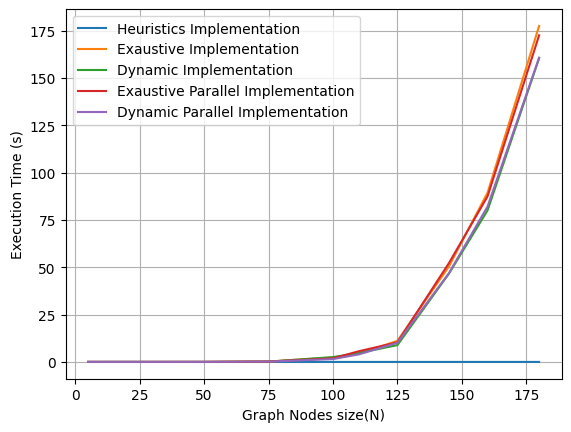

In [14]:
import time
import subprocess
import matplotlib.pyplot as plt
heuristics = []
exaustive = []
dynamic = []
exaustive_parallel = []
dynamic_paralell = []
tamanhos = [5,10,25,50,75,100,110,125,145,160,180]
for i in tamanhos:
  generate_graph(i,False)
  start = time.perf_counter()
  proc = subprocess.run(['./1_edges_heuristic'], text=True, capture_output=True)
  end = time.perf_counter()
  heuristics.append(end - start)

  start = time.perf_counter()
  proc = subprocess.run(['./2_recursive_clique'], text=True, capture_output=True)
  end = time.perf_counter()
  exaustive.append(end - start)

  start = time.perf_counter()
  proc = subprocess.run(['./3_dynamic_programming'], text=True, capture_output=True)
  end = time.perf_counter()
  dynamic.append(end - start)

  start = time.perf_counter()
  proc = subprocess.run(['./4_recursive_clique_parallel'], text=True, capture_output=True)
  end = time.perf_counter()
  exaustive_parallel.append(end - start)

  start = time.perf_counter()
  proc = subprocess.run(['./5_dynamic_programming_parallel'], text=True, capture_output=True)
  end = time.perf_counter()
  dynamic_paralell.append(end - start)



plt.plot(tamanhos,heuristics,label="Heuristics Implementation")
plt.plot(tamanhos,exaustive,label="Exaustive Implementation")
plt.plot(tamanhos,dynamic,label="Dynamic Implementation")
plt.plot(tamanhos,exaustive_parallel,label="Exaustive Parallel Implementation")
plt.plot(tamanhos,dynamic_paralell,label="Dynamic Parallel Implementation")

plt.xlabel("Graph Nodes size(N)")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.grid(True)
plt.show()

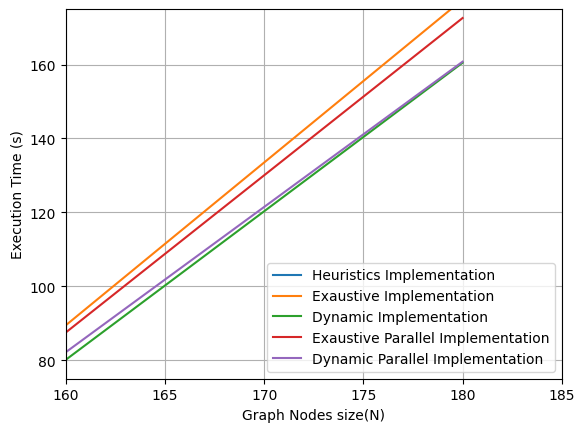

In [18]:
plt.plot(tamanhos,heuristics,label="Heuristics Implementation")
plt.plot(tamanhos,exaustive,label="Exaustive Implementation")
plt.plot(tamanhos,dynamic,label="Dynamic Implementation")
plt.plot(tamanhos,exaustive_parallel,label="Exaustive Parallel Implementation")
plt.plot(tamanhos,dynamic_paralell,label="Dynamic Parallel Implementation")

plt.xlabel("Graph Nodes size(N)")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.grid(True)
plt.xlim([160,185])
plt.ylim([75,175])
plt.show()

## Comparing SpeedUp

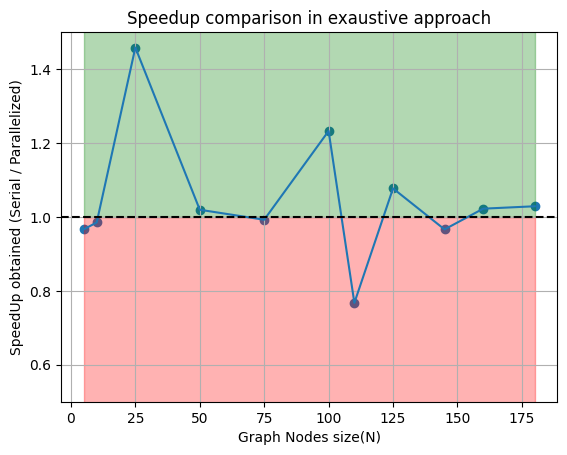

In [50]:
import numpy as np
plt.plot(tamanhos,np.array(exaustive) / np.array(exaustive_parallel))
plt.scatter(tamanhos,np.array(exaustive) / np.array(exaustive_parallel))
plt.title("Speedup comparison in exaustive approach")
plt.xlabel("Graph Nodes size(N)")
plt.ylabel("SpeedUp obtained (Serial / Parallelized)")
plt.axhline(y=1, color='black', linestyle='--', label='Baseline (Speedup = 1)')
midpoint = len(tamanhos) // 2
speedup = np.array(exaustive) / np.array(exaustive_parallel)
plt.fill_between(tamanhos, 1, 5, color='green', alpha=0.3, label='Fill Region')
plt.fill_between(tamanhos, 0, 1, color='red', alpha=0.3, label='Fill Region')
plt.ylim([0.5,1.5])
plt.grid(True)
plt.show()

In [54]:
speedup = np.array(exaustive) / np.array(exaustive_parallel)
average_speedup = np.mean(speedup)

# Calculate the average speedup percentage
average_speedup_percentage = ((average_speedup - 1) / average_speedup) * 100
print(f"The average Speedup obtained by parallel Implementaion was: {average_speedup_percentage:.2f}%")

The average Speedup obtained by parallel Implementaion was: 4.48%


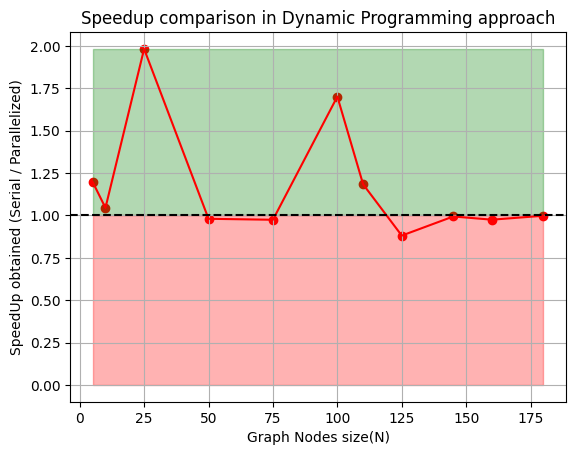

In [55]:
plt.scatter(tamanhos,np.array(dynamic) / np.array(dynamic_paralell),c="r")
plt.plot(tamanhos,np.array(dynamic) / np.array(dynamic_paralell),color="red")

plt.title("Speedup comparison in Dynamic Programming approach")
plt.xlabel("Graph Nodes size(N)")
plt.ylabel("SpeedUp obtained (Serial / Parallelized)")
plt.axhline(y=1, color='black', linestyle='--', label='Baseline (Speedup = 1)')
midpoint = len(tamanhos) // 2
speedup = np.array(dynamic) / np.array(dynamic_paralell)
plt.fill_between(tamanhos, 1, max(speedup), color='green', alpha=0.3, label='Fill Region')
plt.fill_between(tamanhos, 0, 1, color='red', alpha=0.3, label='Fill Region')
#plt.ylim([0.5,1.5])
plt.grid(True)
plt.show()

In [56]:
average_speedup = np.mean(speedup)

# Calculate the average speedup percentage
average_speedup_percentage = ((average_speedup - 1) / average_speedup) * 100
print(f"The average Speedup obtained by parallel Implementaion was: {average_speedup_percentage:.2f}%")

The average Speedup obtained by parallel Implementaion was: 14.82%


## Clean up

In [ ]:
%cd "../.."
!rm -rf Maximal-Clique-Problem